# Gathering Data for this project 

In [72]:
! pip install tweepy

In [2]:
import pandas as pd
import numpy as np
import requests
import os
import datetime
import random


### 1) Twitter archive enhance data

In [12]:
# Supplied file
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### 2)Image prediction file 

In [5]:
# download the image prediction file 
import requests
url= 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
image_request=requests.get(url,allow_redirects=True)

In [11]:
predict=pd.read_csv("image-predictions.tsv", sep="\t")
predict

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


### 3)Twitterpy JSON data 

In [5]:

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
import tweepy
from tweepy.auth import OAuthHandler
import time
consumer_key = 'type your code here'
consumer_secret = 'type your code here'
access_token = 'type your code here '
access_secret = 'type your code here'
# import the code to authorize
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth_handler=auth,
                 parser=tweepy.parsers.JSONParser(),
                 wait_on_rate_limit=True,wait_on_rate_limit_notify=True)



In [6]:
# stream data and write to json 
import json
start_time=time.time()
with open('tweet_json.txt','w') as file:
    for tweet_id in twitter_archive['tweet_id']:
        try:
            tweet=api.get_status(tweet_id,tweet_mode='extended')
            file.write(json.dumps(tweet) + '\n')
        except Exception as e:
            print('No tweet found for {} with error message {}'.format(str(tweet_id),str(e)))
end_time=time.time()
print('whole process finished in {} second'.format(end_time-start_time) )
            

No tweet found for 888202515573088257 with error message [{'code': 144, 'message': 'No status found with that ID.'}]
No tweet found for 873697596434513921 with error message [{'code': 144, 'message': 'No status found with that ID.'}]
No tweet found for 872668790621863937 with error message [{'code': 144, 'message': 'No status found with that ID.'}]
No tweet found for 872261713294495745 with error message [{'code': 144, 'message': 'No status found with that ID.'}]
No tweet found for 869988702071779329 with error message [{'code': 144, 'message': 'No status found with that ID.'}]
No tweet found for 866816280283807744 with error message [{'code': 144, 'message': 'No status found with that ID.'}]
No tweet found for 861769973181624320 with error message [{'code': 144, 'message': 'No status found with that ID.'}]
No tweet found for 856602993587888130 with error message [{'code': 144, 'message': 'No status found with that ID.'}]
No tweet found for 851953902622658560 with error message [{'code

Rate limit reached. Sleeping for: 16


No tweet found for 775096608509886464 with error message [{'code': 144, 'message': 'No status found with that ID.'}]
No tweet found for 771004394259247104 with error message [{'code': 179, 'message': 'Sorry, you are not authorized to see this status.'}]
No tweet found for 770743923962707968 with error message [{'code': 144, 'message': 'No status found with that ID.'}]
No tweet found for 759566828574212096 with error message [{'code': 144, 'message': 'No status found with that ID.'}]
No tweet found for 754011816964026368 with error message [{'code': 144, 'message': 'No status found with that ID.'}]


Rate limit reached. Sleeping for: 116


No tweet found for 680055455951884288 with error message [{'code': 144, 'message': 'No status found with that ID.'}]
whole process finished in 2189.264562368393 second


In [7]:
# read json 
with open("tweet_json.txt",'r') as json_file:
    for line in json_file:
        json_data=json.loads(line)
        print(json.dumps(json_data,indent=2))
        break

{
  "created_at": "Tue Aug 01 16:23:56 +0000 2017",
  "id": 892420643555336193,
  "id_str": "892420643555336193",
  "full_text": "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
  "truncated": false,
  "display_text_range": [
    0,
    85
  ],
  "entities": {
    "hashtags": [],
    "symbols": [],
    "user_mentions": [],
    "urls": [],
    "media": [
      {
        "id": 892420639486877696,
        "id_str": "892420639486877696",
        "indices": [
          86,
          109
        ],
        "media_url": "http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg",
        "media_url_https": "https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg",
        "url": "https://t.co/MgUWQ76dJU",
        "display_url": "pic.twitter.com/MgUWQ76dJU",
        "expanded_url": "https://twitter.com/dog_rates/status/892420643555336193/photo/1",
        "type": "photo",
        "sizes": {
          "thumb": {
            "w": 150,
            "h":

In [8]:
selected_attr=[]
with open('tweet_json.txt','r') as json_file:
    for line in json_file:
        json_data=json.loads(line)
        selected_attr.append({'tweet_id':json_data["id"],
                              'favorites':json_data["favorite_count"],
                              'retweets':json_data['retweet_count'],
                              'timestamp':json_data["created_at"]})
tweet_selected_attr=pd.DataFrame(selected_attr,columns=["tweet_id","favorites",'retweets','timestamp'])        

In [9]:
tweet_selected_attr.head()

,tweet_id,favorites,retweets,timestamp
0,892420643555336193,36361,7736,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,31310,5728,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,23595,3786,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,39648,7892,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,37846,8522,Sat Jul 29 16:00:24 +0000 2017


# Acess data 

In [13]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [30]:
#strange name of 'a','an','the','by' in data => check by excel to find more strang names
twitter_archive["name"].value_counts()

None        745
a           55 
Charlie     12 
Lucy        11 
Cooper      11 
Oliver      11 
Penny       10 
Tucker      10 
Lola        10 
Bo          9  
Winston     9  
Sadie       8  
the         8  
an          7  
Daisy       7  
Toby        7  
Buddy       7  
Bailey      7  
Milo        6  
Oscar       6  
Dave        6  
Rusty       6  
Koda        6  
Leo         6  
Jax         6  
Jack        6  
Bella       6  
Stanley     6  
Scout       6  
Larry       5  
           ..  
Chef        1  
Rupert      1  
Rambo       1  
Tripp       1  
Emanuel     1  
Sky         1  
Damon       1  
Izzy        1  
Patch       1  
Shelby      1  
Lucia       1  
Dutch       1  
by          1  
Jeffrie     1  
Poppy       1  
Hazel       1  
Shikha      1  
Mack        1  
Brooks      1  
Sage        1  
Rorie       1  
Emma        1  
Leonidas    1  
Mary        1  
Tuck        1  
Stuart      1  
Anna        1  
Bruiser     1  
Mac         1  
Gabby       1  
Name: name, Length: 957,

In [20]:
#
predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [27]:
# detect strange name 

predict["p1"].value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                     89 
Chihuahua                    83 
pug                          57 
chow                         44 
Samoyed                      43 
toy_poodle                   39 
Pomeranian                   38 
cocker_spaniel               30 
malamute                     30 
French_bulldog               26 
miniature_pinscher           23 
Chesapeake_Bay_retriever     23 
seat_belt                    22 
Siberian_husky               20 
German_shepherd              20 
Staffordshire_bullterrier    20 
web_site                     19 
Cardigan                     19 
Maltese_dog                  18 
Eskimo_dog                   18 
teddy                        18 
beagle                       18 
Shetland_sheepdog            18 
Rottweiler                   17 
Shih-Tzu                     17 
Lakeland_terrier             17 
Italian_greyhound            16 
kuvasz                       16 
          

In [13]:
# detect strange name
predict["p2"].value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
Chesapeake_Bay_retriever           41
French_bulldog                     41
toy_poodle                         37
cocker_spaniel                     34
miniature_poodle                   33
Siberian_husky                     33
beagle                             28
Eskimo_dog                         27
collie                             27
Pembroke                           27
kuvasz                             26
Italian_greyhound                  22
Pekinese                           21
American_Staffordshire_terrier     21
Samoyed                            20
toy_terrier                        20
malinois                           20
miniature_pinscher                 20
chow                               20
Boston_bull                        19
Norwegian_elkhound                 19
Staffordshir

In [14]:
# detect strange name
predict['p3'].value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
chow                              32
Staffordshire_bullterrier         32
beagle                            31
cocker_spaniel                    31
toy_poodle                        29
Pomeranian                        29
Pekinese                          29
Great_Pyrenees                    27
Chesapeake_Bay_retriever          27
Pembroke                          27
malamute                          26
French_bulldog                    26
American_Staffordshire_terrier    24
pug                               23
Cardigan                          23
basenji                           21
toy_terrier                       20
bull_mastiff                      20
Siberian_husky                    19
Shetland_sheepdog                 17
Boston_bull                       17
d

## Clean 


## Quality

### Archive data 

In [28]:
archive_data=twitter_archive.copy()
archive_data.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


-  1)missing record on `in reply to user id/user_status`,`retweeted_status_id/user_id`,`retweeted_status_timestamp` are NA=> drop 

In [29]:
archive_data=archive_data.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1)
archive_data

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


- 2) Remove +00000 in `timestamp`

In [30]:
# remove +0000 
archive_data["timestamp"]=archive_data['timestamp'].str[:-5]
archive_data

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


- 3) `timestampt` is not datatime=> change to time data 

In [31]:
# To change time to datetime
archive_data.timestamp = pd.to_datetime(archive_data.timestamp)
# recheck 
archive_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null datetime64[ns]
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 221.0+ KB


- 4)`name` has strange name like 'a' 'an' 'the' 'by'  quite,actually, just,one,his,my,very,old ,not=>replace with NONE

In [32]:
#create a list
list_name=["a",'an', 'the', 'by','quite','actually', 'just','one','his','my','very','old' ,'not','getting']
# replace with approriate name
archive_data["name"] = archive_data['name'].replace(list_name,'None')
# recheck 
archive_data

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


- 6)OliviÃ©r , RalphÃ©, AmÃ©lie,GÃ²rdÃ³n,,FrÃ¶nq,getting, DevÃ³n=> change to proper names

In [34]:
#create a list
list_name=['OliviÃ©r' , 'RalphÃ©', 'AmÃ©lie','GÃ²rdÃ³n','FrÃ¶nq', 'DevÃ³n']
right_name=['Olivar',"Ralpha","Amali",'Gardan',"Fran",'Devan']
# replace with approriate name
archive_data["name"] = archive_data['name'].replace(list_name,right_name)
# recheck 
archive_data

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


- 6)`expand_url` NA - mean no tweet you retweet => drop to combine: 3 tables 

In [35]:
archive_data.drop('expanded_urls',axis=1,inplace=True)


- 7)replace the `source` content by ‘Twitter for iphone’, ‘Vine - Make a Scene’, ‘Twitter Web Client’, and ‘TweetDeck’.

In [36]:
# find unique value for source
archive_data["source"].unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [37]:
archive_data['sources']=archive_data["source"].str.extract('(Twitter for iPhone|Twitter Web Client|Vine - Make a Scene|TweetDeck)',expand=True)
# drop the old source value to make data clean 
archive_data.drop('source',axis=1,inplace=True)

In [38]:
archive_data.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,sources
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None,Twitter for iPhone
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None,Twitter for iPhone
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None,Twitter for iPhone
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None,Twitter for iPhone
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None,Twitter for iPhone


###  predict data

In [39]:
# clone the data 
predict_data=predict.copy()



- 8)Capitalize first Letter of name for consitance, replace '_' with space , add space in name of bread in p1 p2 p3 

In [40]:
# replace '_' with space 
predict_data["p1"]=predict_data['p1'].str.replace('_',' ')
predict_data["p2"]=predict_data['p2'].str.replace('_',' ')
predict_data["p3"]=predict_data['p3'].str.replace('_',' ')
# chang to lowercase 
predict_data["p1"]=predict_data["p1"].str.lower()
predict_data["p2"]=predict_data["p2"].str.lower()
predict_data["p3"]=predict_data["p3"].str.lower()
predict_data

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh springer spaniel,0.465074,True,collie,0.156665,True,shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,bernese mountain dog,0.651137,True,english springer,0.263788,True,greater swiss mountain dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box turtle,0.933012,False,mud turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,tibetan mastiff,0.058279,True,fur coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping cart,0.962465,False,shopping basket,0.014594,False,golden retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature poodle,0.201493,True,komondor,0.192305,True,soft-coated wheaten terrier,0.082086,True



## Tidiness

### Archive data 


- 1)`rating_numerator`,`rating_denominator` are redundant => combine to 1 columns named `rating`=>need to merge 3 tables

In [41]:
# add column named 'rating' is the numerator / denominator
archive_data["rating"]=archive_data["rating_numerator"]/archive_data["rating_denominator"]

# drop colum rating numerator and rating denominator
archive_data.drop(['rating_numerator','rating_denominator'],axis=1,inplace=True)


archive_data

,tweet_id,timestamp,text,name,doggo,floofer,pupper,puppo,sources,rating
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,Phineas,None,None,None,None,Twitter for iPhone,1.3
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,Tilly,None,None,None,None,Twitter for iPhone,1.3
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,Archie,None,None,None,None,Twitter for iPhone,1.2
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,Darla,None,None,None,None,Twitter for iPhone,1.3
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,Franklin,None,None,None,None,Twitter for iPhone,1.2
5,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,None,None,None,None,None,Twitter for iPhone,1.3
6,890971913173991426,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets ...,Jax,None,None,None,None,Twitter for iPhone,1.3
7,890729181411237888,2017-07-28 00:22:40,When you watch your owner call another dog a g...,None,None,None,None,None,Twitter for iPhone,1.3
8,890609185150312448,2017-07-27 16:25:51,This is Zoey. She doesn't want to be one of th...,Zoey,None,None,None,None,Twitter for iPhone,1.3
9,890240255349198849,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,Cassie,doggo,None,None,None,Twitter for iPhone,1.4


- 2)`doggo` `floofer`, `pupper`,`puppo` are redundant=> melt data combine to 1 columns

In [42]:
# take dog type 
archive_data['dog_stages'] = archive_data.text.str.extract('(doggo|floofer|pupper|puppo)', expand = True)

In [43]:
# drop columns
archive_data.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace = True)

In [44]:
archive_data

,tweet_id,timestamp,text,name,sources,rating,dog_stages
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,Phineas,Twitter for iPhone,1.3,NaN
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,Tilly,Twitter for iPhone,1.3,NaN
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,Archie,Twitter for iPhone,1.2,NaN
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,Darla,Twitter for iPhone,1.3,NaN
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,Franklin,Twitter for iPhone,1.2,NaN
5,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,None,Twitter for iPhone,1.3,NaN
6,890971913173991426,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets ...,Jax,Twitter for iPhone,1.3,NaN
7,890729181411237888,2017-07-28 00:22:40,When you watch your owner call another dog a g...,None,Twitter for iPhone,1.3,NaN
8,890609185150312448,2017-07-27 16:25:51,This is Zoey. She doesn't want to be one of th...,Zoey,Twitter for iPhone,1.3,NaN
9,890240255349198849,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,Cassie,Twitter for iPhone,1.4,doggo


## Merge 

In [52]:
# merge 3 file archive_data , predict_data and tweet_selected_attr
clean_data=archive_data.merge(predict_data, on='tweet_id')
clean_data=clean_data.merge(tweet_selected_attr,on="tweet_id")
clean_data

,tweet_id,timestamp_x,text,name,sources,rating,dog_stages,jpg_url,img_num,p1,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets,timestamp_y
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,Phineas,Twitter for iPhone,1.3,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,...,False,bagel,0.085851,False,banana,0.076110,False,36361,7736,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,Tilly,Twitter for iPhone,1.3,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,...,True,pekinese,0.090647,True,papillon,0.068957,True,31310,5728,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,Archie,Twitter for iPhone,1.2,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,...,True,malamute,0.078253,True,kelpie,0.031379,True,23595,3786,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,Darla,Twitter for iPhone,1.3,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper towel,...,False,labrador retriever,0.168086,True,spatula,0.040836,False,39648,7892,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,Franklin,Twitter for iPhone,1.2,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,...,True,english springer,0.225770,True,german short-haired pointer,0.175219,True,37846,8522,Sat Jul 29 16:00:24 +0000 2017
5,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,None,Twitter for iPhone,1.3,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,chesapeake bay retriever,...,True,irish terrier,0.116317,True,indian elephant,0.076902,False,19060,2848,Sat Jul 29 00:08:17 +0000 2017
6,890971913173991426,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets ...,Jax,Twitter for iPhone,1.3,NaN,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,appenzeller,...,True,border collie,0.199287,True,ice lolly,0.193548,False,11106,1859,Fri Jul 28 16:27:12 +0000 2017
7,890729181411237888,2017-07-28 00:22:40,When you watch your owner call another dog a g...,None,Twitter for iPhone,1.3,NaN,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,pomeranian,...,True,eskimo dog,0.178406,True,pembroke,0.076507,True,61252,17265,Fri Jul 28 00:22:40 +0000 2017
8,890609185150312448,2017-07-27 16:25:51,This is Zoey. She doesn't want to be one of th...,Zoey,Twitter for iPhone,1.3,NaN,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,irish terrier,...,True,irish setter,0.193054,True,chesapeake bay retriever,0.118184,True,26256,3934,Thu Jul 27 16:25:51 +0000 2017
9,890240255349198849,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,Cassie,Twitter for iPhone,1.4,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,pembroke,...,True,cardigan,0.451038,True,chihuahua,0.029248,True,29969,6729,Wed Jul 26 15:59:51 +0000 2017


## Storage 

In [53]:
# store the cleaned data in new master csv file 
clean_data.to_csv('twitter_master.csv', index = False)

## Visualization and insight 

In [3]:
cleanned_data=pd.read_csv("twitter_master.csv")
cleanned_data.head()

,tweet_id,timestamp_x,text,name,sources,rating,dog_stages,jpg_url,img_num,p1,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets,timestamp_y
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,Phineas,Twitter for iPhone,1.3,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,...,False,bagel,0.085851,False,banana,0.076110,False,36361,7736,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,Tilly,Twitter for iPhone,1.3,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,...,True,pekinese,0.090647,True,papillon,0.068957,True,31310,5728,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,Archie,Twitter for iPhone,1.2,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,...,True,malamute,0.078253,True,kelpie,0.031379,True,23595,3786,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,Darla,Twitter for iPhone,1.3,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper towel,...,False,labrador retriever,0.168086,True,spatula,0.040836,False,39648,7892,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,Franklin,Twitter for iPhone,1.2,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,...,True,english springer,0.225770,True,german short-haired pointer,0.175219,True,37846,8522,Sat Jul 29 16:00:24 +0000 2017


# Most talked dogs

Text(0.5, 1.0, 'Dog_stages')

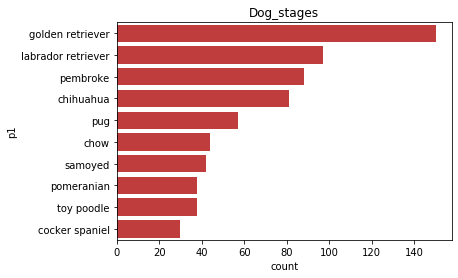

In [82]:
cleanned_data1=cleanned_data[cleanned_data['p1_dog']==True]
# rank value
type_order=cleanned_data1["p1"].value_counts().index
# chose base color to avoid distraction 
import seaborn as sb
import matplotlib.pyplot as plt
base_color=sb.color_palette()[3]
# draw charts
sb.countplot(data=cleanned_data1,y="p1",color=base_color,order=type_order[:10])
plt.title("Dog_stages")

**Golden retriever and labrador are 2 types of dogs which are posted the most by #weratedog**

# Rating for these dogs 

Text(0.5, 1.0, 'Rating of Dog_stages')

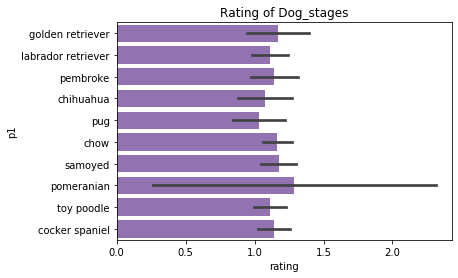

In [74]:
# plotting
base_color = sb.color_palette()[4]
sb.barplot(data = cleanned_data1, x = 'rating', y = 'p1',
               color = base_color, order =type_order[:10], ci = 'sd')
plt.title("Rating of Dog_stages")

Text(0.5, 1.0, 'Favorites of Dog_stages')

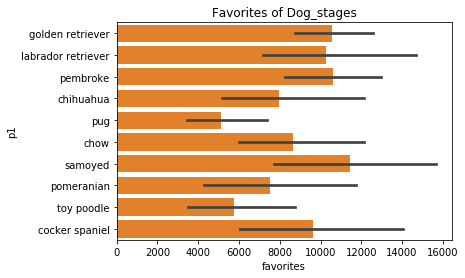

In [85]:
# plotting
base_color = sb.color_palette()[1]
sb.barplot(data = cleanned_data1, x = 'favorites', y = 'p1',
               color = base_color, order =type_order[:10])
plt.title("Favorites of Dog_stages")

Text(0.5, 1.0, 'retweet of Dog_stages')

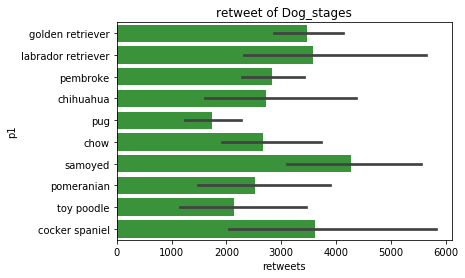

In [88]:
# plotting
base_color = sb.color_palette()[2]
sb.barplot(data = cleanned_data1, x = 'retweets', y = 'p1',
               color = base_color, order =type_order[:10])
plt.title("retweet of Dog_stages")

**Eventhough Golden retriever is the type of dog which is talked the most , the pomeranian is the rank the most , and has the biggest range from low to high, and samoyed breed is loved the most**

Text(0.5, 1.0, 'Rating counts')

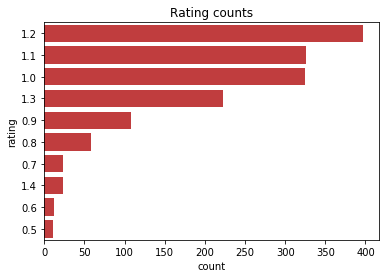

In [76]:
# rank value
type_order=cleanned_data1["rating"].value_counts().index
# chose base color to avoid distraction 
import seaborn as sb
base_color=sb.color_palette()[3]
# draw charts
sb.countplot(data=cleanned_data1,y="rating",color=base_color,order=type_order[:10])
plt.title("Rating counts")

In [49]:
cleanned_data1["rating"].describe()

count    1520.000000
mean        1.101215
std         0.250450
min         0.200000
25%         1.000000
50%         1.100000
75%         1.200000
max         7.500000
Name: rating, dtype: float64

rating 1.2 is given the most, average rating is 1.1  max is 7.5, min 0.2

## Sources

Text(0.5, 1.0, 'Sources of twitter # weratingdog user')

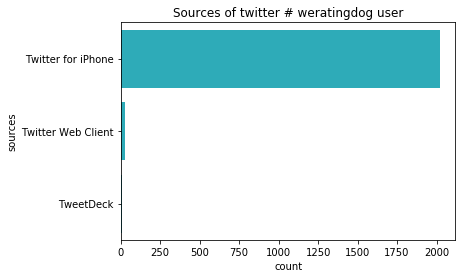

In [77]:
# rank value
source_order=cleanned_data["sources"].value_counts().index
# chose base color to avoid distraction 
import seaborn as sb
base_color=sb.color_palette()[9]
# draw charts
sb.countplot(data=cleanned_data,y="sources",color=base_color,order=source_order)
plt.title("Sources of twitter # weratingdog user")

**People use iphone to comments**

# common dogs stages

Text(0.5, 1.0, 'Dog stages in weratedog  ')

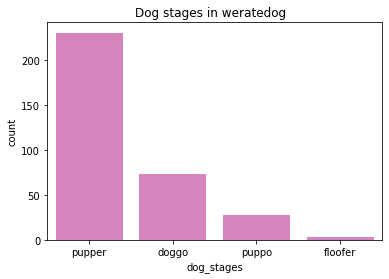

In [78]:
# rank value
stage_order=cleanned_data["dog_stages"].value_counts().index
# chose base color to avoid distraction 
import seaborn as sb
base_color=sb.color_palette()[6]
# draw charts
sb.countplot(data=cleanned_data,x="dog_stages",color=base_color,order=stage_order)
plt.title('Dog stages in weratedog  ')

# correlation of tweet and favorites

Text(0.5, 1.0, 'Relationship between favorites and retweets')

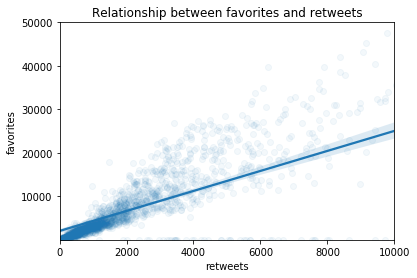

In [80]:
# plot but it is over lap alot so => jitter it 
import matplotlib.pyplot as plt
sb.regplot(data=cleanned_data, x="retweets",y="favorites", x_jitter=0.3, scatter_kws={"alpha":1/20})
plt.xlim(0,10000)
plt.ylim(10,50000)
plt.title("Relationship between favorites and retweets")

## Limitation 

- Difficulty in understanding regrex. The project could be better if I can extract the `text` in 3 seperated columns `text`, `rating`, `link`
to know more about regrex : https://stackoverflow.com/a/48769624/3271001
- tweepy is a new library to me to work with, so I need to practice more to become master in this library 